# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
from IPython.display import display

df = pd.read_csv('data/human_body_temperature.csv')

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>

In [2]:
display(df.shape)
display(df.head())
display(df.info())

(130, 3)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


None

In [3]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [4]:
temperatures = df['temperature']

In [5]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    
    return x, y

In [6]:
def plot_ecdf(data):
    """plot an ECDF of your data against an ECDF for a normal distribution 
    with the same mean and standard deviation of your data"""
    
    mean = np.mean(data)
    std = np.std(data)
    
    samples = np.random.normal(mean, std, size=10000)
    
    x, y = ecdf(data)
    x_theory, y_theory = ecdf(samples)
    
    sns.set()
    _ = plt.plot(x, y, marker='.', linestyle='none')
    _ = plt.plot(x_theory, y_theory)
    _ = plt.xlabel('temperatures')
    _ = plt.ylabel('CDF')
    plt.margins(0.02)
    plt.show()

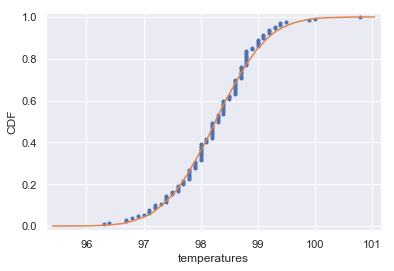

In [7]:
plot_ecdf(temperatures)

Appears to fit very nicely!


C:\Users\gideo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


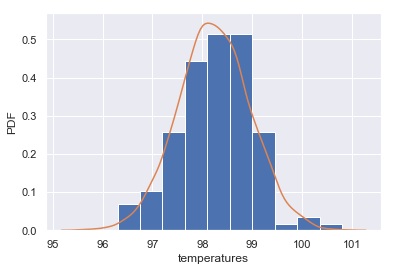

In [8]:
samples = np.random.normal(np.mean(temperatures), np.std(temperatures), size=10000)
sns.set()
_ = plt.hist(temperatures, density=True)
#_ = plt.hist(samples, density=True)
_ = sns.distplot(samples, hist=False)
_ = plt.xlabel('temperatures')
_ = plt.ylabel('PDF')
plt.show()

C:\Users\gideo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


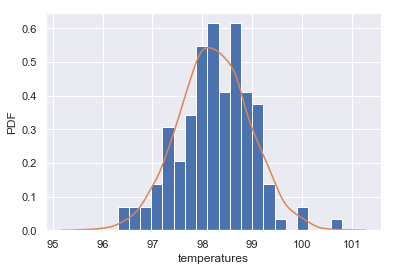

In [9]:
sns.set()
_ = plt.hist(temperatures, density=True, bins=20)
#_ = plt.hist(samples, density=True)
_ = sns.distplot(samples, hist=False)
_ = plt.xlabel('temperatures')
_ = plt.ylabel('PDF')
plt.show()

We can also check with a histogram. Here the fit seems OK confirming our result from the ECDF graph, but histrograms aren't as reliable to check for normality of a distribution because their interpretation can suffer from binning bias.

2)
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>

In [10]:
len(temperatures)

130

Is the sample size large? Yes. It has more than 30 samples, so the assumption of normailty holds.  
Are the observations independent? Yes. Choosing temperatures from different people would be an independent process, and the data is also independent if it is chosen randomly from a population that has a size greater than 10 times that of the sample. Assumably, there are more than 1,300 temperature readings to have read from.

3)
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

#### Bootstrap Hypothesis Test

 Null Hypothesis: The population mean is 98.6 degrees F.  
 Alternative Hypothesis: The population mean is less than 98.6 degrees F.  
 Test statistic: difference in sample mean.

In [11]:
temperatures_shifted = temperatures - np.mean(temperatures) + 98.6

In [12]:
def diff_from_986(data):
    return np.mean(data) - 98.6

In [13]:
def draw_bs_reps(data, func, size=1):
    np.random.seed(42)
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))
    return bs_replicates

In [14]:
diff_obs = diff_from_986(temperatures)
diff_obs

-0.35076923076921673

In [15]:
bs_replicates = draw_bs_reps(temperatures_shifted, diff_from_986, 10000)

In [16]:
p = np.sum(bs_replicates <= diff_obs) / len(bs_replicates) #one tailed-test
p

0.0

Since our p-value is 0, we conclude that the true population mean is not 98.6 degrees F, which holds for any significance level.

   <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?


One samples test: a one sample test compares one set of data to a single number. Here, we are comparing one set of data 
(temperatures) to a single number (98.6 degrees F).
    

   <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 


It is appropriate to use a t-statistic. This is because our population standard deviation is unknown, and whenever the population standard deviation is unknown, it is preferable to use a t-statistic. Using a z-statistic when n >= 30 is "OK" though and won't result in a loss of too much accuracy.

In [17]:
pval = scipy.stats.ttest_1samp(temperatures, 98.6)[1]/2 #one tailed-test
pval

1.2053160207780638e-07

The p-value is 1.2053160207780638e-07.

<li> Now try using the other test. How is the result different? Why

In [18]:
z_stat = scipy.stats.ttest_1samp(temperatures, 98.6)[0]
p_value = scipy.stats.norm.sf(abs(z_stat))
p_value

2.4510785070506077e-08

Our p-value for the z-statistic is 2.4510785070506077e-08. This is different from our t-test p-value of 1.2053160207780638e-07 in that it is smaller, meaning it is more unlikely. This is because the t distribution has fatter tails so more of the distribution lies within them and critical values for a given percentage are farther from the mean than for the z distribution. As a result, less of the distribution lies beyond the test statistic we are testing, which in our case is the same for both the t-statistic and z-statistic (since we don't have the real population standard deviation and must use our sample standard deviation).

4)
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

In [19]:
np.random.seed(44)
sample_temps = np.random.choice(temperatures, 10)

In [20]:
# T-test
pval = scipy.stats.ttest_1samp(sample_temps, 98.6)[1]/2 #one tailed-test
pval

#test_stat = scipy.stats.ttest_1samp(sample_temps, 98.6)
#t_pval = scipy.stats.t.sf(np.abs(-1.3420329644639306), 10-1)  

0.19010789761536995

In [21]:
#z_pval = scipy.stats.norm.sf(abs(test_stat))

z_stat = scipy.stats.ttest_1samp(sample_temps, 98.6)[0] # get the t-statistic, which will be the same as the z, 
#since we don't know sigma
p_value = scipy.stats.norm.sf(abs(z_stat)) #get the area to the right of the z-stat, which is our p-value
p_value

0.17807173401053356

The correct statistic to use is the t statistic. This is because we don't know the population standard deviation. Additionally, we also have a sample size of less than 30, which makes the use of the t-statistic more important, as we can sometimes 'get away' with using a z-statistic when n>=30 since the t distribution tends to the z distribution (i.e. normal distribution) as n increases.  
We notice that the difference in our case is about 1% for the p-value. This tells us that the using the z-statistic when it is not appropriate to use it as in our case increases the probability of Type 1 error, or incorrectly rejecting the Null Hypothesis. This is in accordance with the theory.

5)
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the bootstrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>

In [22]:
# Bootstrapping
def many_samples(data, size=1):
    """Generate bootstrap replicates"""
    np.random.seed(42)
    bs_samples = (np.random.choice(data, len(data))).tolist()
    for i in range(size-1):
        bs_samples += (np.random.choice(data, len(data))).tolist()
    return bs_samples

bs_samples = many_samples(temperatures, size=10000)
np.percentile(bs_samples, [2.5, 97.5]) #using a confidence interval of 95%

array([96.7, 99.5])

Therefore, by bootstrapping, about 95% of the values should fall between 96.7 degrees F and 99.5 degrees F. Values below and above those, respectively, should be considered "abnormal".

In [23]:
# Frequentist
t_stat = scipy.stats.t.ppf(0.975, 130-1)
moe = t_stat * (np.std(temperatures)/np.sqrt(1))
ci = np.mean(temperatures) + np.array([-1, 1])*moe
ci

array([96.80420002, 99.69426152])

Therefore, by using a frequentist approach, about 95% of the values should fall between 96.8 degrees F and 99.7 degrees F. Values below and above those, respectively, should be considered "abnormal".

6)
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

For this problem, we will use a two-sample permutation test to assess the hypothesis that the temperatures of males and females come from the same distribution. We can also use a bootstrap test to do this, but a permutation test is preferred because it is more accurate (exact, in fact).

Null Hypothesis: There is no difference between the distributions of male temperatures and female ones.  
Alternative Hypothesis: The distribution of male temperatures is lower than that of female temperatures.  
Test-statistic: Difference in means.

In [24]:
np.random.seed(42)
def permutation_sample(data_1, data_2):
    """Generate a permution sample"""
    
    # Concatenate the data sets: data
    data = np.concatenate((data_1, data_2))
    
    # Permute the concatenated array and split the permuted array into two
    perm_sample_1 = np.random.permutation(data)[:len(data_1)]
    perm_sample_2= np.random.permutation(data)[len(data_1):]
    
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """ Generate multiple permutation replicates"""
    
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    
    for i in range(size):
        #Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        
        #Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    
    return diff

In [25]:
male_temps = df[df['gender'] == 'M']['temperature']

In [26]:
female_temps = df[df['gender'] == 'F']['temperature']

In [27]:
# Real difference of mean temperatures
empiracal_diff_means = np.mean(male_temps) - np.mean(female_temps)
empiracal_diff_means

-0.289230769230727

In [28]:
# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(male_temps, female_temps, diff_of_means, size=10000)

In [29]:
# Compute p-value: p
p = np.sum(perm_replicates <= empiracal_diff_means) / len(perm_replicates)

In [30]:
# Print the result
print('p-value =', p)

p-value = 0.0009


We get a p-value of about 0.1% so there therefore appears to be a real, significant difference between male and female temperatures. Using a commonly accepted significance level of 5% means our observed difference has statistical significance, and even an alpha value as low as 1% results in a statistically significant result.  


In [31]:
male_temps.mean()

98.1046153846154

In [32]:
female_temps.mean()

98.39384615384613

### Conclusion

It seems like the value of 98.6 degrees F is not correct as the mean value of human body temperature. This was established by question 3. Question 1 established that our temperature data is approximately normal, and 2 established that our data satisfies the normality and independence assumptions neccessary for inferences on the mean. Question 4 established that a t-statistic is more appropriate to use for sample size less than 30 and that a mean value of 98.6 degrees F is more likely with a small sample. Question 5 established that a confidence interval (prediction interval) for individual temperature readings. Finally, question 6 established that there are differences in the distributions of men's and women's temperatures and the mean value of both doesn't appear to be 98.6 degrees F.